# Transfer learning in PyTorch

The `11_transfer_learning` notebook focuses on applying transfer learning techniques, which involve leveraging pretrained models to accelerate training on new tasks. This approach is particularly useful when working with smaller datasets or specialized tasks. 

In this notebook, key topics include preparing the dataset, loading a pretrained model, freezing and modifying layers to adapt it for the new task, and training the modified model. It also covers evaluating model performance and experimenting with hyperparameters to optimize results.

## Table of contents

1. [Understanding transfer learning](#understanding-transfer-learning)
2. [Setting up the environment](#setting-up-the-environment)
3. [Preparing the dataset](#preparing-the-dataset)
4. [Loading a pretrained model](#loading-a-pretrained-model)
5. [Freezing and modifying layers](#freezing-and-modifying-layers)
6. [Training the model](#training-the-model)
7. [Evaluating model performance](#evaluating-model-performance)
8. [Experimenting with hyperparameters](#experimenting-with-hyperparameters)

## Understanding transfer learning

Transfer learning is a machine learning technique where a model developed for a specific task is reused as the starting point for a model on a second, related task. Instead of training a model from scratch on a new task, transfer learning leverages the patterns and features that a model has already learned from a previous task. This is particularly effective when the new task has limited data, or when training from scratch would be too computationally expensive.

### **Why use transfer learning?**

There are several reasons why transfer learning is widely used in deep learning, especially in tasks involving large models:

- **Efficiency**: Training a large neural network from scratch can be computationally expensive and time-consuming. Transfer learning allows you to leverage the knowledge of a pretrained model, significantly reducing the time required for training.
- **Limited data**: In many real-world applications, collecting large amounts of labeled data is difficult. Transfer learning helps overcome this limitation by using a model that has already been trained on a large dataset, such as ImageNet, and fine-tuning it on a smaller, domain-specific dataset.
- **Generalization**: Models trained on large datasets such as ImageNet learn powerful, general features that can be transferred to other tasks. For instance, in a pretrained CNN, the earlier layers tend to capture low-level features like edges and textures, while the later layers capture more task-specific features. By reusing these general features, the model can generalize well to new tasks.

### **Key concepts in transfer learning**

#### **Pretrained models**

Pretrained models are the foundation of transfer learning. A model is first trained on a large dataset for a specific task (like image classification on ImageNet). Once trained, the model's weights and architecture can be transferred and adapted to a new task. Commonly used pretrained models include **ResNet**, **VGG**, **AlexNet**, **Inception**, and **DenseNet**.

Pretrained models have learned a variety of patterns, which are stored in the form of weights. These learned patterns, especially in the early layers of convolutional neural networks (CNNs), often represent general features that are useful across a wide range of tasks.

#### **Two main strategies in transfer learning**

1. **Feature extraction**:
   - In this approach, the pretrained model is used as a feature extractor. The convolutional base (i.e., the layers that extract features) of the pretrained model is kept frozen, and only the final classification layer is replaced and trained on the new task.
   - This is especially useful when the new dataset is small, as the pretrained model has already learned powerful, general features. By only training the final layer, you reduce the risk of overfitting.

2. **Fine-tuning**:
   - In fine-tuning, you not only replace the final classification layer but also unfreeze part (or all) of the convolutional base and retrain it on the new task. This allows the model to adapt its features to the specific characteristics of the new dataset.
   - Fine-tuning is more computationally expensive than feature extraction, and there is a higher risk of overfitting, especially if the new dataset is small. However, it often leads to better performance when the new task is significantly different from the original task.

### **How transfer learning works in CNNs**

Transfer learning in convolutional neural networks (CNNs) is especially effective because of the hierarchical nature of the features learned by CNNs:

- **Early layers**: The initial layers of a CNN learn low-level features like edges, gradients, and textures. These features are often useful across many different image-related tasks.
- **Mid-level layers**: Middle layers capture more complex patterns, such as shapes and objects.
- **Late layers**: The final layers of the CNN tend to be more task-specific, focusing on high-level features related to the specific dataset the model was trained on (e.g., specific object categories).

In transfer learning, the goal is to reuse the early and mid-level features of a pretrained model, which are generalizable, while adapting or retraining the later, task-specific layers to suit the new task.

#### **Feature extraction process**

In the feature extraction approach, the pretrained model’s convolutional layers act as a fixed feature extractor. The process works as follows:
1. **Freeze the convolutional layers**: During training, the weights of the convolutional layers remain fixed, and only the classifier (fully connected layers) is trained.
2. **Replace the final layer**: The final classification layer is replaced with a new one that matches the number of classes in the new dataset.
3. **Train the new classifier**: Only the new classification layer is trained, typically with a much lower learning rate, to fine-tune the final model.

This approach works well when the new dataset is small, as the convolutional layers have already been trained to capture general patterns.

#### **Fine-tuning process**

In fine-tuning, the goal is to allow part of the pretrained model to be retrained to better adapt to the new task:
1. **Unfreeze some layers**: A portion of the pretrained layers, often the later layers, is unfrozen so that their weights can be updated during training.
2. **Replace and train the classifier**: The final layer is replaced with a task-specific classifier, and both the classifier and the unfrozen layers are trained.
3. **Lower learning rate**: Fine-tuning is typically done with a much lower learning rate to avoid making drastic changes to the pretrained weights.

Fine-tuning can be particularly beneficial when the new task is very different from the original task (e.g., transferring from natural images to medical images), as it allows the model to adapt to the unique characteristics of the new dataset.

### **Transfer learning strategies**

The specific transfer learning strategy to use depends on several factors, such as the size of the new dataset and the similarity between the original and new tasks:

- **Small dataset, similar task**: Feature extraction is typically sufficient. The general features learned by the pretrained model should be applicable to the new task, and only the classifier needs to be trained.
- **Large dataset, similar task**: Fine-tuning can be beneficial. With enough data, the pretrained model’s weights can be adjusted to better suit the new task, improving performance.
- **Small dataset, dissimilar task**: Feature extraction is usually the best option. Since the dataset is small, fine-tuning the model could lead to overfitting, so freezing most of the layers and training a new classifier reduces this risk.
- **Large dataset, dissimilar task**: Fine-tuning is preferred. Since the task is different, the model needs to learn task-specific features from the new data, and a large dataset provides enough information for fine-tuning without overfitting.

### **Advantages of transfer learning**

Transfer learning offers several key benefits:
- **Faster training**: Since the model has already been trained on a large dataset, the training process for the new task is significantly faster.
- **Improved performance with limited data**: Transfer learning can lead to better performance on tasks where only a small dataset is available, as the pretrained model brings valuable knowledge from a large dataset.
- **Effective use of computational resources**: Transfer learning allows you to leverage pretrained models that required extensive computational resources, avoiding the need to retrain large models from scratch.

### **Limitations of transfer learning**

Despite its advantages, transfer learning has some limitations:
- **Task dissimilarity**: If the original task (used for pretraining) is very different from the new task, the features learned by the pretrained model may not be as useful. In such cases, the model may need to be fine-tuned extensively or even trained from scratch.
- **Overfitting**: Fine-tuning a pretrained model on a small dataset can lead to overfitting, as the model may become overly specific to the new data.

## Setting up the environment

##### **Q1: How do you install the necessary libraries for loading pretrained models and training in PyTorch?**


In [1]:
# !pip install torch torchvision matplotlib

##### **Q2: How do you import the required modules for model loading, training, and dataset handling in PyTorch?**


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

##### **Q3: How do you set up your environment to use a GPU if available, or fallback to CPU in PyTorch?**


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


##### **Q4: How do you set a random seed in PyTorch to ensure reproducibility of results?**

In [4]:
torch.manual_seed(42)
if device == "cuda":
    torch.cuda.manual_seed(42)

## Preparing the dataset

##### **Q5: How do you load a dataset using PyTorch’s `torchvision.datasets` module?**


In [5]:
transform = transforms.ToTensor()
dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

Files already downloaded and verified


##### **Q6: How do you apply image transformations such as resizing and normalization to match the input requirements of a pretrained model?**


In [6]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match the input size for pretrained models
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize based on ImageNet standards
])

##### **Q7: How do you split a dataset into training, validation, and test sets using PyTorch?**


In [7]:
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

##### **Q8: How do you create DataLoaders for efficient batch loading of the dataset in PyTorch?**

In [8]:
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),  # Data augmentation for training
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transform_test_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Update dataset loading to include these transformations:
train_dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform_train)
val_dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform_test_val)
test_dataset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform_test_val)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


## Loading a pretrained model

##### **Q9: How do you load a pretrained model, such as ResNet, from PyTorch’s `torchvision.models`?**


In [9]:
model = torchvision.models.resnet50(pretrained=True)
model = model.to(device)

/home/fellmir/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/fellmir/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


##### **Q10: How do you inspect the architecture of a pretrained model to understand its layers and components?**


In [10]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

##### **Q11: How do you print the number of parameters in the pretrained model and identify which layers will be updated during training?**


In [11]:
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total Parameters: {total_params}, Trainable Parameters: {trainable_params}")

Total Parameters: 25557032, Trainable Parameters: 25557032


##### **Q12: How do you modify the final fully connected layer of a pretrained model to match the number of output classes in your dataset?**

In [12]:
model.fc = nn.Linear(model.fc.in_features, 100)  # CIFAR-100 has 100 classes
model = model.to(device)

## Freezing and modifying layers

##### **Q13: How do you freeze all layers of the pretrained model to prevent them from being updated during training?**


In [13]:
for param in model.parameters():
    param.requires_grad = False

##### **Q14: How do you selectively unfreeze certain layers of the pretrained model for fine-tuning?**


In [14]:
for param in model.layer4.parameters():  # Unfreeze the last residual block for fine-tuning
    param.requires_grad = True

##### **Q15: How do you verify which layers of the model are frozen and which are trainable after modifying the layers?**

In [15]:
for name, param in model.named_parameters():
    print(f"{name}: {'Trainable' if param.requires_grad else 'Frozen'}")

conv1.weight: Frozen
bn1.weight: Frozen
bn1.bias: Frozen
layer1.0.conv1.weight: Frozen
layer1.0.bn1.weight: Frozen
layer1.0.bn1.bias: Frozen
layer1.0.conv2.weight: Frozen
layer1.0.bn2.weight: Frozen
layer1.0.bn2.bias: Frozen
layer1.0.conv3.weight: Frozen
layer1.0.bn3.weight: Frozen
layer1.0.bn3.bias: Frozen
layer1.0.downsample.0.weight: Frozen
layer1.0.downsample.1.weight: Frozen
layer1.0.downsample.1.bias: Frozen
layer1.1.conv1.weight: Frozen
layer1.1.bn1.weight: Frozen
layer1.1.bn1.bias: Frozen
layer1.1.conv2.weight: Frozen
layer1.1.bn2.weight: Frozen
layer1.1.bn2.bias: Frozen
layer1.1.conv3.weight: Frozen
layer1.1.bn3.weight: Frozen
layer1.1.bn3.bias: Frozen
layer1.2.conv1.weight: Frozen
layer1.2.bn1.weight: Frozen
layer1.2.bn1.bias: Frozen
layer1.2.conv2.weight: Frozen
layer1.2.bn2.weight: Frozen
layer1.2.bn2.bias: Frozen
layer1.2.conv3.weight: Frozen
layer1.2.bn3.weight: Frozen
layer1.2.bn3.bias: Frozen
layer2.0.conv1.weight: Frozen
layer2.0.bn1.weight: Frozen
layer2.0.bn1.bias: F

## Training the model

##### **Q16: How do you define the loss function for a classification task when using a pretrained model in PyTorch?**


In [16]:
criterion = nn.CrossEntropyLoss()

##### **Q17: How do you configure an optimizer to update only the unfrozen layers of the pretrained model?**


In [17]:
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-4)

##### **Q18: How do you implement a training loop to update the model’s weights using the training dataset in PyTorch?**


In [18]:
def train_model(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    return running_loss / len(dataloader)

##### **Q19: How do you implement gradient clipping to prevent exploding gradients during training with a pretrained model?**


In [19]:
torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

tensor(0.)

##### **Q20: How do you monitor and plot the training loss and accuracy over epochs during the model training?**

In [20]:
def train_model(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    
    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Apply gradient clipping

        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_loss / len(dataloader)
    train_accuracy = correct_train / total_train
    return train_loss, train_accuracy

In [21]:
def validate_model(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct_val = 0
    total_val = 0
    
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_loss = running_loss / len(dataloader)
    val_accuracy = correct_val / total_val
    return val_loss, val_accuracy

In [22]:
num_epochs = 10
print_every = 1  # Print every 5 epochs
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    train_loss, train_accuracy = train_model(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    val_loss, val_accuracy = validate_model(model, val_loader, criterion, device)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    if (epoch + 1) % print_every == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, "
              f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}, "
              f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

Epoch 1/10, Training Loss: 1.8850, Training Accuracy: 0.5514, Validation Loss: 0.9408, Validation Accuracy: 0.7491
Epoch 2/10, Training Loss: 1.0442, Training Accuracy: 0.7220, Validation Loss: 0.6172, Validation Accuracy: 0.8302
Epoch 3/10, Training Loss: 0.7656, Training Accuracy: 0.7933, Validation Loss: 0.3991, Validation Accuracy: 0.8868
Epoch 4/10, Training Loss: 0.5774, Training Accuracy: 0.8421, Validation Loss: 0.2815, Validation Accuracy: 0.9203
Epoch 5/10, Training Loss: 0.4471, Training Accuracy: 0.8773, Validation Loss: 0.2063, Validation Accuracy: 0.9428
Epoch 6/10, Training Loss: 0.3453, Training Accuracy: 0.9056, Validation Loss: 0.1479, Validation Accuracy: 0.9590
Epoch 7/10, Training Loss: 0.2710, Training Accuracy: 0.9242, Validation Loss: 0.1075, Validation Accuracy: 0.9712
Epoch 8/10, Training Loss: 0.2239, Training Accuracy: 0.9369, Validation Loss: 0.0910, Validation Accuracy: 0.9753
Epoch 9/10, Training Loss: 0.1869, Training Accuracy: 0.9476, Validation Loss: 0

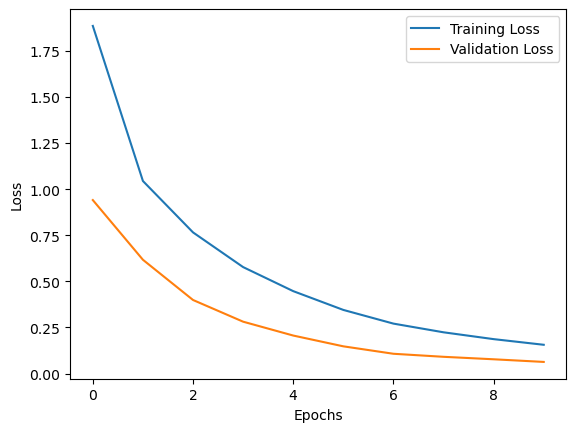

In [23]:
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

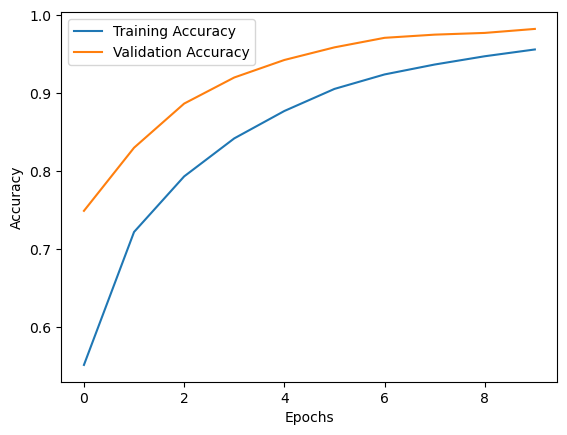

In [24]:
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Evaluating the model

##### **Q21: How do you evaluate the trained model on the validation or test dataset using PyTorch?**


In [25]:
def evaluate_model(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return running_loss / len(dataloader), accuracy

##### **Q22: How do you calculate and print the classification accuracy of the pretrained model on the test set?**


In [26]:
test_loss, test_accuracy = evaluate_model(model, test_loader, criterion, device)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Test Loss: 1.1442, Test Accuracy: 0.7384


##### **Q23: How do you visualize the confusion matrix to assess the model's classification performance on the test data?**


In [27]:
import random
from sklearn.metrics import confusion_matrix
import seaborn as sns

selected_classes = random.sample(range(100), 10)  # Randomly select 10 classes from the 100 classes

all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        mask = [label.item() in selected_classes for label in labels]  # Filter to include only selected classes
        filtered_preds = predicted[mask].cpu().numpy()
        filtered_labels = labels[mask].cpu().numpy()

        all_preds.extend(filtered_preds)
        all_labels.extend(filtered_labels)

In [28]:
conf_matrix = confusion_matrix(all_labels, all_preds, labels=selected_classes)

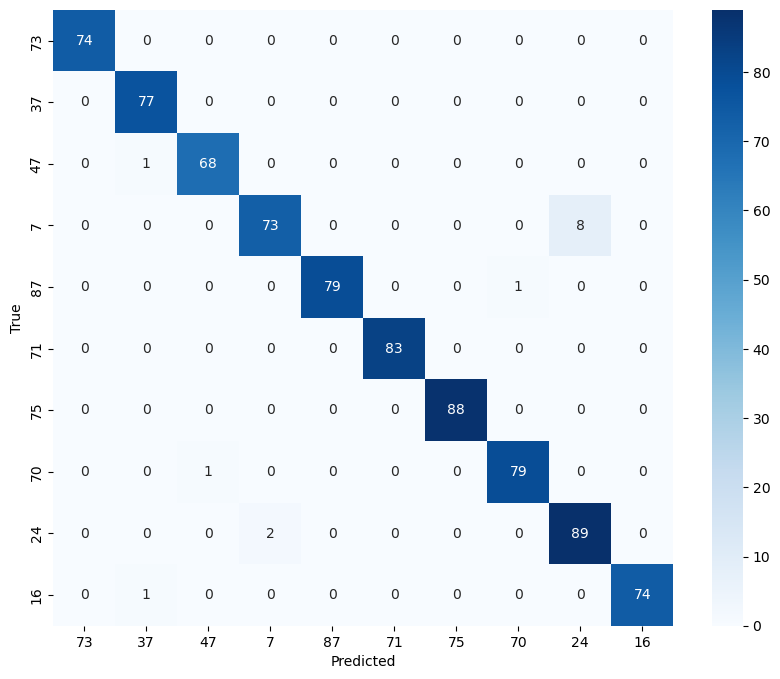

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=selected_classes, yticklabels=selected_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##### **Q24: How do you implement model evaluation in a batch-wise manner to handle large datasets more efficiently in PyTorch?**

In [30]:
def evaluate_model_batchwise(model, dataloader, criterion, device, batch_size=32):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return running_loss / len(dataloader), accuracy

## Experimenting with hyperparameters

##### **Q25: How do you experiment with different learning rates for the frozen and unfrozen layers of the pretrained model?**


In [31]:
def train_with_lr_grid_search(model, train_loader, val_loader, criterion, device, num_epochs=5, lr_fc_list=[1e-3], lr_layer4_list=[1e-4]):
    for lr_fc in lr_fc_list:
        for lr_layer4 in lr_layer4_list:
            print(f"\nTraining with lr_fc: {lr_fc}, lr_layer4: {lr_layer4}")
            train_losses, val_losses = [], []
            train_accuracies, val_accuracies = [], []

            params_to_update = [
                {'params': model.fc.parameters(), 'lr': lr_fc},  # Custom learning rate for fully connected layer
                {'params': model.layer4.parameters(), 'lr': lr_layer4}  # Custom learning rate for layer4
            ]
            optimizer = optim.Adam(params_to_update)

            for epoch in range(num_epochs):
                train_loss, train_accuracy = train_model(model, train_loader, criterion, optimizer, device)
                train_losses.append(train_loss)
                train_accuracies.append(train_accuracy)

                val_loss, val_accuracy = validate_model(model, val_loader, criterion, device)
                val_losses.append(val_loss)
                val_accuracies.append(val_accuracy)

                print(f"Epoch {epoch+1}/{num_epochs}, "
                      f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}, "
                      f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

            plt.plot(train_losses, label=f'Training Loss (lr_fc={lr_fc}, lr_layer4={lr_layer4})')
            plt.plot(val_losses, label=f'Validation Loss (lr_fc={lr_fc}, lr_layer4={lr_layer4})')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.legend()
            plt.show()

            plt.plot(train_accuracies, label=f'Training Accuracy (lr_fc={lr_fc}, lr_layer4={lr_layer4})')
            plt.plot(val_accuracies, label=f'Validation Accuracy (lr_fc={lr_fc}, lr_layer4={lr_layer4})')
            plt.xlabel('Epochs')
            plt.ylabel('Accuracy')
            plt.legend()
            plt.show()


Training with lr_fc: 1e-05, lr_layer4: 1e-05
Epoch 1/2, Training Loss: 0.0717, Training Accuracy: 0.9817, Validation Loss: 0.0158, Validation Accuracy: 0.9964
Epoch 2/2, Training Loss: 0.0419, Training Accuracy: 0.9906, Validation Loss: 0.0099, Validation Accuracy: 0.9977


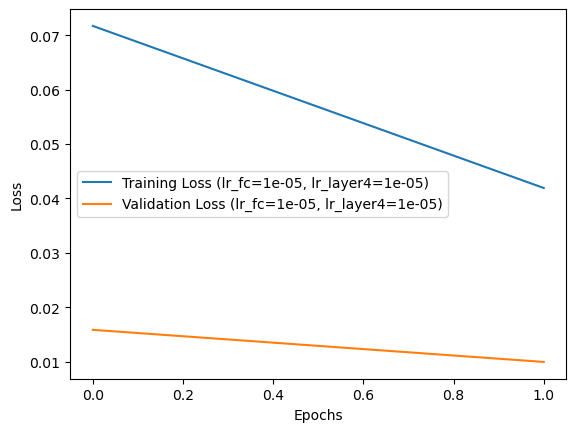

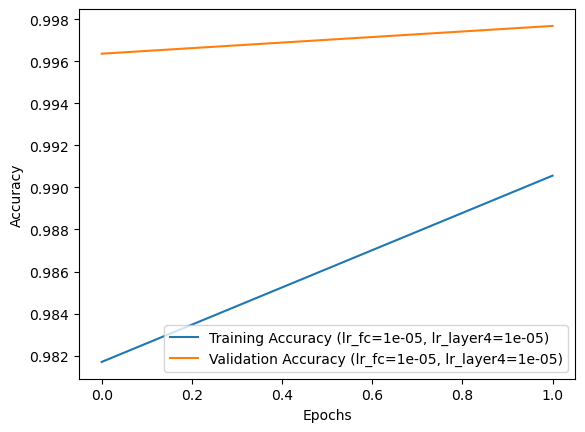


Training with lr_fc: 1e-05, lr_layer4: 1e-06
Epoch 1/2, Training Loss: 0.0320, Training Accuracy: 0.9930, Validation Loss: 0.0090, Validation Accuracy: 0.9981
Epoch 2/2, Training Loss: 0.0284, Training Accuracy: 0.9942, Validation Loss: 0.0081, Validation Accuracy: 0.9983


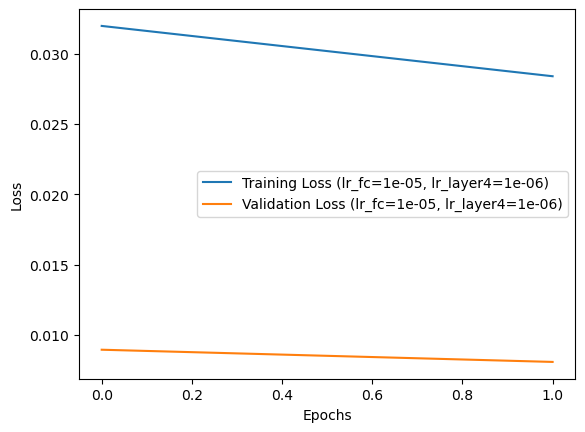

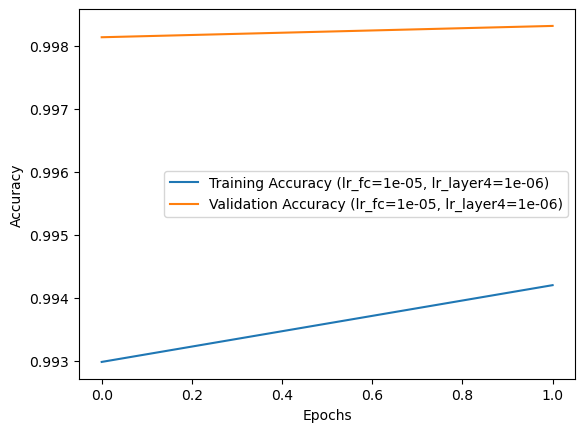

In [32]:
lr_fc_list = [1e-5]
lr_layer4_list = [1e-5, 1e-6]

train_with_lr_grid_search(model, train_loader, val_loader, criterion, device, num_epochs=2, lr_fc_list=lr_fc_list, lr_layer4_list=lr_layer4_list)

##### **Q26: How do you modify the batch size in the DataLoader and analyze its impact on training performance?**


In [33]:
def train_with_different_batch_sizes(model, train_dataset, val_dataset, criterion, device, num_epochs=10, batch_sizes=[32, 64, 128]):
    for batch_size in batch_sizes:
        print(f"\nTraining with Batch Size: {batch_size}")
        
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

        train_losses, val_losses = [], []
        train_accuracies, val_accuracies = [], []

        optimizer = optim.Adam(model.parameters(), lr=1e-4)

        for epoch in range(num_epochs):
            train_loss, train_accuracy = train_model(model, train_loader, criterion, optimizer, device)
            train_losses.append(train_loss)
            train_accuracies.append(train_accuracy)

            val_loss, val_accuracy = validate_model(model, val_loader, criterion, device)
            val_losses.append(val_loss)
            val_accuracies.append(val_accuracy)

            print(f"Epoch {epoch+1}/{num_epochs}, "
                  f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}, "
                  f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

        plt.plot(train_losses, label=f'Training Loss (Batch={batch_size})')
        plt.plot(val_losses, label=f'Validation Loss (Batch={batch_size})')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        plt.plot(train_accuracies, label=f'Training Accuracy (Batch={batch_size})')
        plt.plot(val_accuracies, label=f'Validation Accuracy (Batch={batch_size})')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()


Training with Batch Size: 4
Epoch 1/2, Training Loss: 1.2242, Training Accuracy: 0.6984, Validation Loss: 0.6520, Validation Accuracy: 0.8576
Epoch 2/2, Training Loss: 1.0519, Training Accuracy: 0.7304, Validation Loss: 0.6103, Validation Accuracy: 0.8707


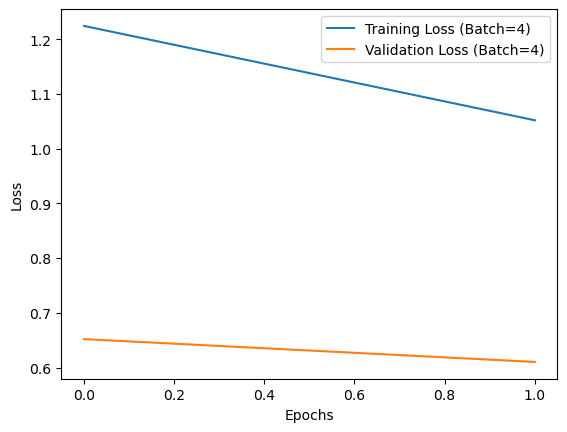

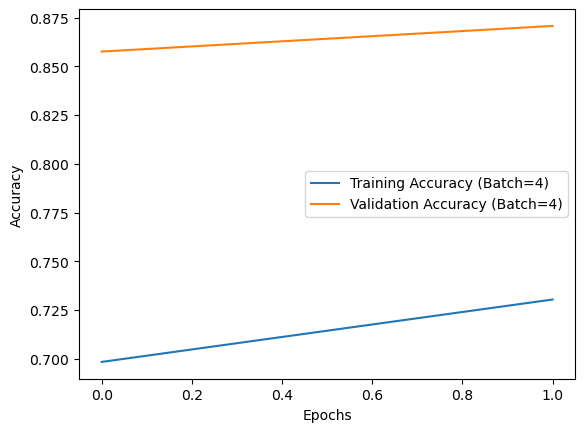


Training with Batch Size: 8
Epoch 1/2, Training Loss: 0.5939, Training Accuracy: 0.8363, Validation Loss: 0.2275, Validation Accuracy: 0.9340
Epoch 2/2, Training Loss: 0.4765, Training Accuracy: 0.8685, Validation Loss: 0.1691, Validation Accuracy: 0.9518


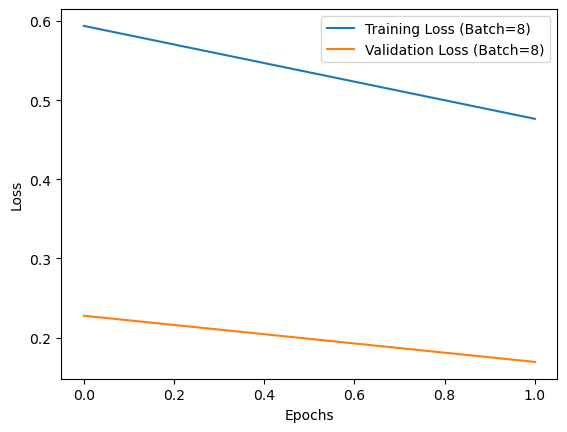

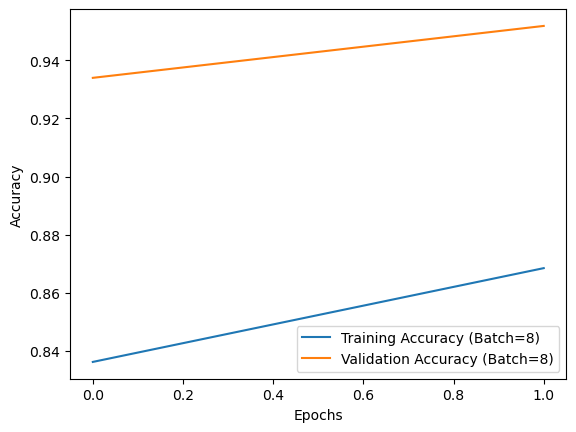


Training with Batch Size: 16
Epoch 1/2, Training Loss: 0.2376, Training Accuracy: 0.9315, Validation Loss: 0.0782, Validation Accuracy: 0.9765
Epoch 2/2, Training Loss: 0.1781, Training Accuracy: 0.9477, Validation Loss: 0.0550, Validation Accuracy: 0.9835


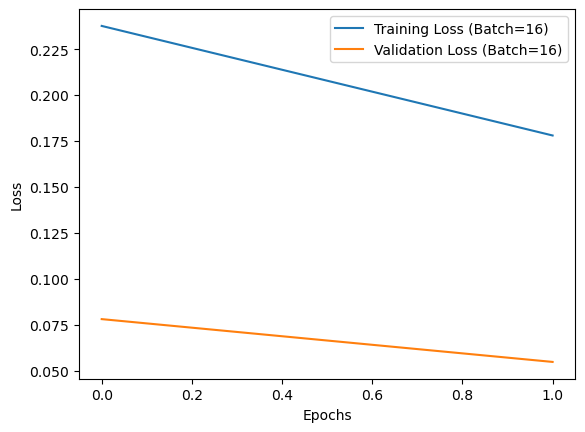

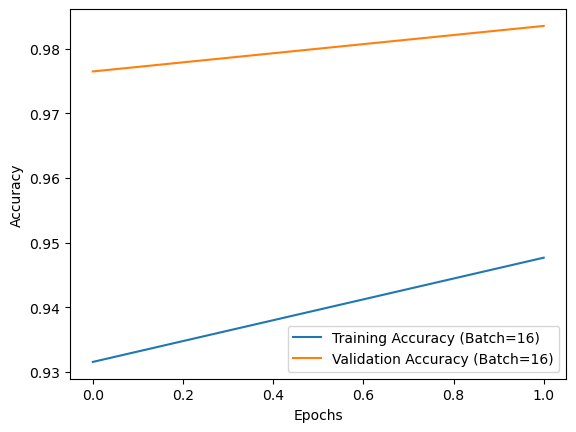

In [34]:
train_with_different_batch_sizes(model, train_dataset, val_dataset, criterion, device, num_epochs=2, batch_sizes=[4, 8, 16])

##### **Q27: How do you adjust the number of training epochs and observe its effect on overfitting or underfitting the model?**


In [35]:
def train_with_different_epochs(model, train_loader, val_loader, criterion, optimizer, device, epoch_options=[10, 20, 30]):
    for num_epochs in epoch_options:
        print(f"\nTraining with Epochs: {num_epochs}")
        
        train_losses, val_losses = [], []
        train_accuracies, val_accuracies = [], []

        for epoch in range(num_epochs):
            train_loss, train_accuracy = train_model(model, train_loader, criterion, optimizer, device)
            train_losses.append(train_loss)
            train_accuracies.append(train_accuracy)

            val_loss, val_accuracy = validate_model(model, val_loader, criterion, device)
            val_losses.append(val_loss)
            val_accuracies.append(val_accuracy)

            print(f"Epoch {epoch+1}/{num_epochs}, "
                  f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}, "
                  f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

        plt.plot(train_losses, label=f'Training Loss (Epochs={num_epochs})')
        plt.plot(val_losses, label=f'Validation Loss (Epochs={num_epochs})')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        plt.plot(train_accuracies, label=f'Training Accuracy (Epochs={num_epochs})')
        plt.plot(val_accuracies, label=f'Validation Accuracy (Epochs={num_epochs})')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()


Training with Epochs: 2


Epoch 1/2, Training Loss: 0.0784, Training Accuracy: 0.9766, Validation Loss: 0.0339, Validation Accuracy: 0.9902
Epoch 2/2, Training Loss: 0.0645, Training Accuracy: 0.9813, Validation Loss: 0.0225, Validation Accuracy: 0.9933


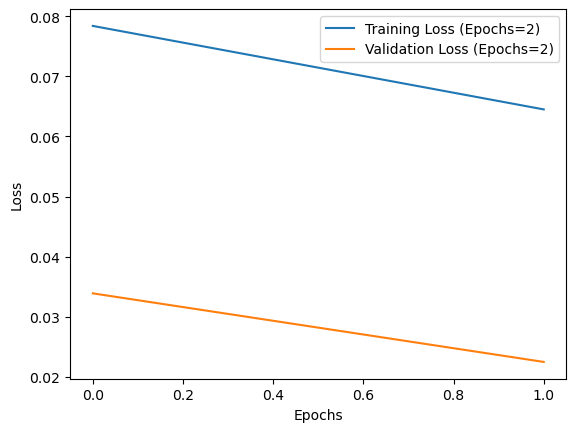

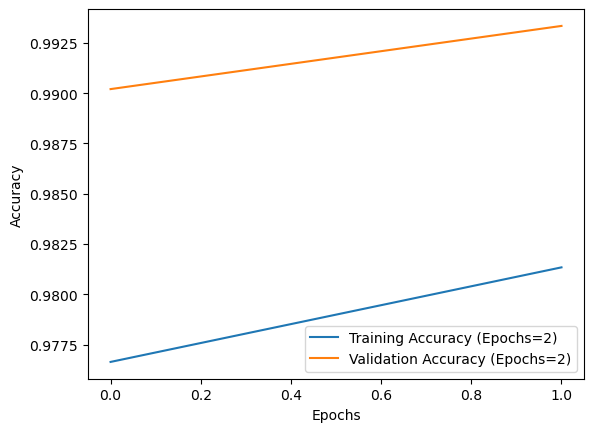


Training with Epochs: 3
Epoch 1/3, Training Loss: 0.0520, Training Accuracy: 0.9839, Validation Loss: 0.0180, Validation Accuracy: 0.9947
Epoch 2/3, Training Loss: 0.0476, Training Accuracy: 0.9860, Validation Loss: 0.0166, Validation Accuracy: 0.9954
Epoch 3/3, Training Loss: 0.0443, Training Accuracy: 0.9869, Validation Loss: 0.0113, Validation Accuracy: 0.9969


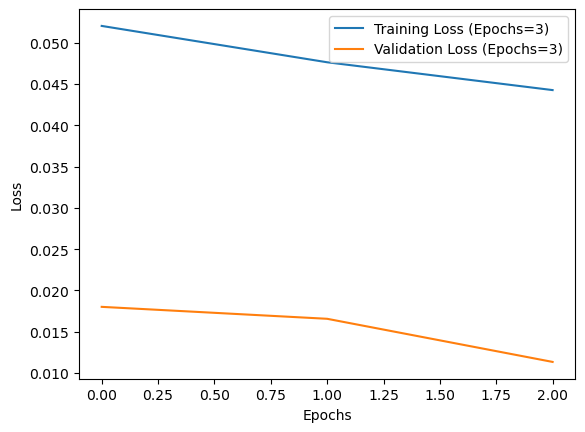

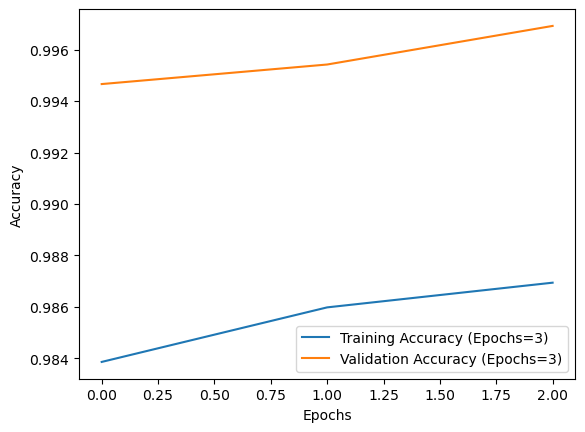


Training with Epochs: 4
Epoch 1/4, Training Loss: 0.0384, Training Accuracy: 0.9880, Validation Loss: 0.0108, Validation Accuracy: 0.9966
Epoch 2/4, Training Loss: 0.0372, Training Accuracy: 0.9892, Validation Loss: 0.0149, Validation Accuracy: 0.9958
Epoch 3/4, Training Loss: 0.0372, Training Accuracy: 0.9886, Validation Loss: 0.0121, Validation Accuracy: 0.9963
Epoch 4/4, Training Loss: 0.0328, Training Accuracy: 0.9904, Validation Loss: 0.0148, Validation Accuracy: 0.9959


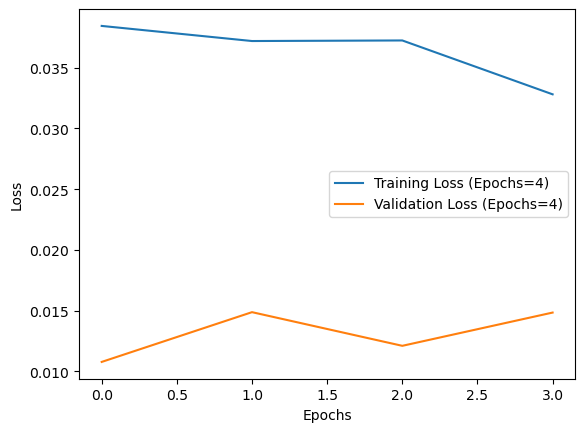

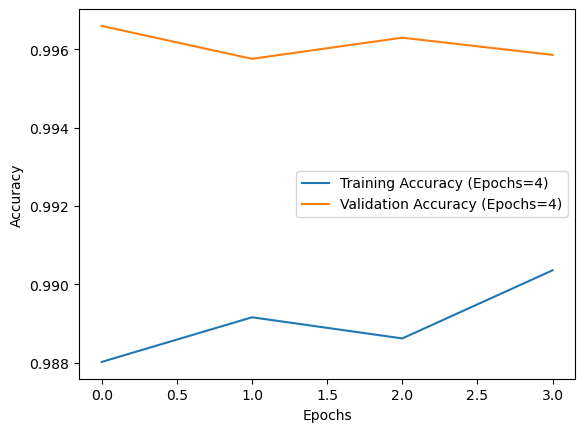

In [36]:
train_with_different_epochs(model, train_loader, val_loader, criterion, optimizer, device, epoch_options=[2, 3, 4])

##### **Q28: How do you experiment with different optimizers and their parameters to improve model performance?**

In [37]:
def train_with_different_optimizers(model, train_loader, val_loader, criterion, device, num_epochs=10):
    optimizers = {
        "Adam": optim.Adam(model.parameters(), lr=1e-4),
        "SGD": optim.SGD(model.parameters(), lr=1e-2, momentum=0.9),
        "RMSprop": optim.RMSprop(model.parameters(), lr=1e-4)
    }

    for opt_name, optimizer in optimizers.items():
        print(f"\nTraining with Optimizer: {opt_name}")
        
        train_losses, val_losses = [], []
        train_accuracies, val_accuracies = [], []

        for epoch in range(num_epochs):
            train_loss, train_accuracy = train_model(model, train_loader, criterion, optimizer, device)
            train_losses.append(train_loss)
            train_accuracies.append(train_accuracy)

            val_loss, val_accuracy = validate_model(model, val_loader, criterion, device)
            val_losses.append(val_loss)
            val_accuracies.append(val_accuracy)

            print(f"Epoch {epoch+1}/{num_epochs}, "
                  f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}, "
                  f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

        plt.plot(train_losses, label=f'Training Loss ({opt_name})')
        plt.plot(val_losses, label=f'Validation Loss ({opt_name})')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        plt.plot(train_accuracies, label=f'Training Accuracy ({opt_name})')
        plt.plot(val_accuracies, label=f'Validation Accuracy ({opt_name})')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()


Training with Optimizer: Adam
Epoch 1/2, Training Loss: 0.0331, Training Accuracy: 0.9904, Validation Loss: 0.0097, Validation Accuracy: 0.9968
Epoch 2/2, Training Loss: 0.0326, Training Accuracy: 0.9907, Validation Loss: 0.0096, Validation Accuracy: 0.9972


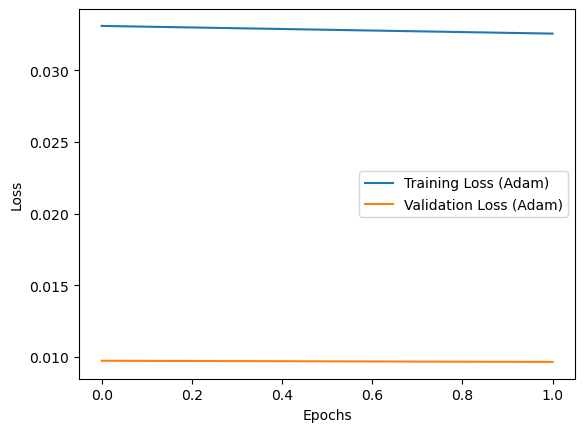

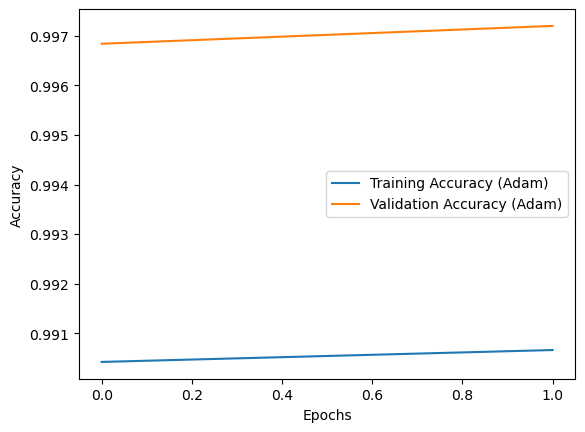


Training with Optimizer: SGD
Epoch 1/2, Training Loss: 0.0156, Training Accuracy: 0.9955, Validation Loss: 0.0022, Validation Accuracy: 0.9994
Epoch 2/2, Training Loss: 0.0092, Training Accuracy: 0.9972, Validation Loss: 0.0013, Validation Accuracy: 0.9995


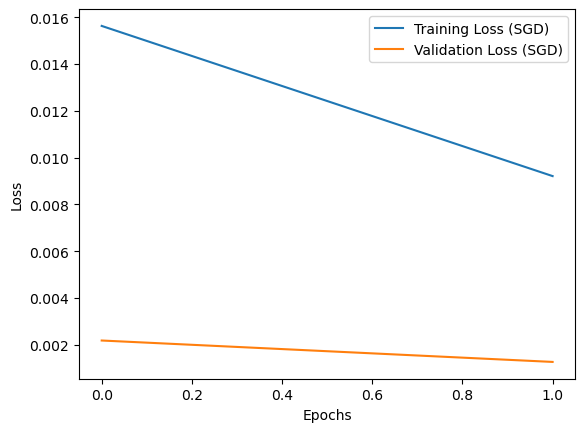

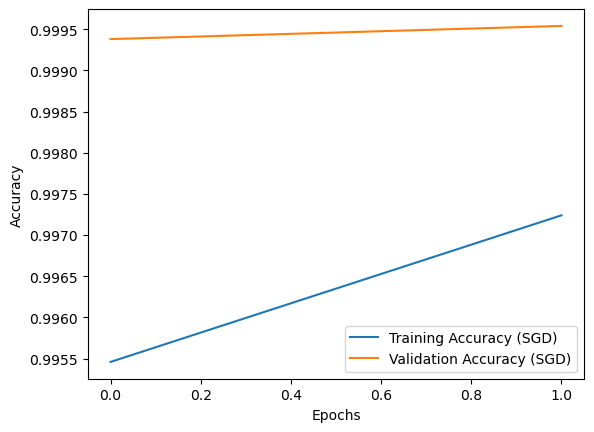


Training with Optimizer: RMSprop
Epoch 1/2, Training Loss: 0.0284, Training Accuracy: 0.9916, Validation Loss: 0.0078, Validation Accuracy: 0.9975
Epoch 2/2, Training Loss: 0.0228, Training Accuracy: 0.9933, Validation Loss: 0.0058, Validation Accuracy: 0.9985


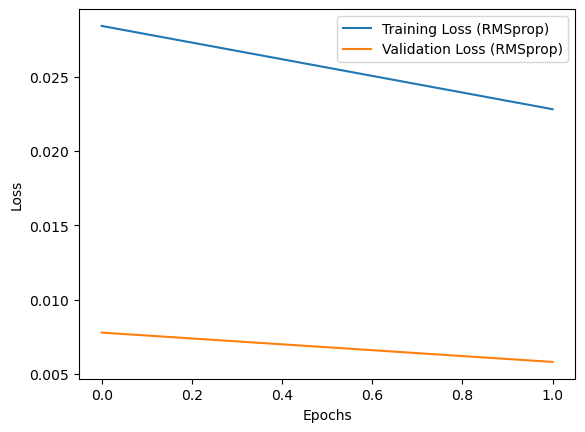

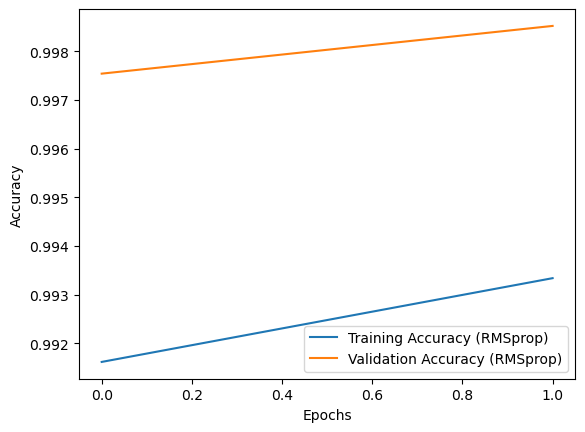

In [38]:
train_with_different_optimizers(model, train_loader, val_loader, criterion, device, num_epochs=2)

In [ ]:
import shutil
import os

if os.path.exists('data'):
    shutil.rmtree('data')
    print("Folder 'data' has been deleted.")
else:
    print("Folder 'data' does not exist.")